In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data

# original data
original_classification = pd.read_csv("./__DATA/original_classification.csv")
original_classification_perf = pd.read_csv("./__DATA/original_classification_performance.csv")
original_authentikation = pd.read_csv("./__DATA/original_authentication.csv")

# chromium isolated
chromium_isolated_classification = pd.read_csv("./__DATA/chromium_isolated_classification.csv")
chromium_isolated_classification_perf = pd.read_csv("./__DATA/chromium_isolated_classification_performance.csv")
chromium_isolated_authentikation = pd.read_csv("./__DATA/chromium_isolated_authentication.csv")

# chromium remote
chromium_remote_classification = pd.read_csv("./__DATA/chromium_remote_classification.csv")
chromium_remote_classification_perf = pd.read_csv("./__DATA/chromium_remote_classification_performance.csv")
chromium_remote_authentikation = pd.read_csv("./__DATA/chromium_remote_authentication.csv")

# remote data - rtt
chromium_remote_rtt = pd.read_csv('./complete.csv')

In [3]:
# extract data


# classification
original_class_err_a2 = original_classification_perf.loc[original_classification_perf.iloc[:,0] == "a2"]['Error'].iloc[0]
original_class_err_r2 = original_classification_perf.loc[original_classification_perf.iloc[:,0] == "r2"]['Error'].iloc[0]
original_class_err_r234_a234 = original_classification_perf.loc[original_classification_perf.iloc[:,0] == "r234_a234"]['Error'].iloc[0]
original_class_err_r234_a23 = original_classification_perf.loc[original_classification_perf.iloc[:,0] == "r234_a23"]['Error'].iloc[0]

chomium_isolated_class_err_a2 = chromium_isolated_classification_perf.loc[chromium_isolated_classification_perf.iloc[:,0] == "a2"]['Error'].iloc[0]
chomium_isolated_class_err_r2 = chromium_isolated_classification_perf.loc[chromium_isolated_classification_perf.iloc[:,0] == "r2"]['Error'].iloc[0]
chomium_isolated_class_err_r234_a234 = chromium_isolated_classification_perf.loc[chromium_isolated_classification_perf.iloc[:,0] == "r234_a234"]['Error'].iloc[0]
chomium_isolated_class_err_r234_a23 = chromium_isolated_classification_perf.loc[chromium_isolated_classification_perf.iloc[:,0] == "r234_a23"]['Error'].iloc[0]

chomium_remote_class_err_a2 = chromium_remote_classification_perf.loc[chromium_remote_classification_perf.iloc[:,0] == "a2"]['Error'].iloc[0]
chomium_remote_class_err_r2 = chromium_remote_classification_perf.loc[chromium_remote_classification_perf.iloc[:,0] == "r2"]['Error'].iloc[0]
chomium_remote_class_err_r234_a234 = chromium_remote_classification_perf.loc[chromium_remote_classification_perf.iloc[:,0] == "r234_a234"]['Error'].iloc[0]
chomium_remote_class_err_r234_a23 = chromium_remote_classification_perf.loc[chromium_remote_classification_perf.iloc[:,0] == "r234_a23"]['Error'].iloc[0]

# auth
original_auth_fr = (original_authentikation['Result'][0]  / original_authentikation['Attempts'][0]) * 100
original_auth_fa = (original_authentikation['Result'][1] / original_authentikation['Attempts'][1]) * 100

chomium_isolated_auth_fr = (chromium_isolated_authentikation['Result'][0]  / chromium_isolated_authentikation['Attempts'][0]) * 100
chomium_isolated_auth_fa = (chromium_isolated_authentikation['Result'][1] / chromium_isolated_authentikation['Attempts'][1]) * 100

chomium_isolated_auth_fr = (chromium_isolated_authentikation['Result'][0]  / chromium_isolated_authentikation['Attempts'][0]) * 100
chomium_isolated_auth_fa = (chromium_isolated_authentikation['Result'][1] / chromium_isolated_authentikation['Attempts'][1]) * 100

chomium_remote_auth_fr = (chromium_remote_authentikation['Result'][0]  / chromium_remote_authentikation['Attempts'][0]) * 100
chomium_remote_auth_fa = (chromium_remote_authentikation['Result'][1] / chromium_remote_authentikation['Attempts'][1]) * 100


# rtt
chromium_remote_rtt_data = chromium_remote_rtt['rtt']

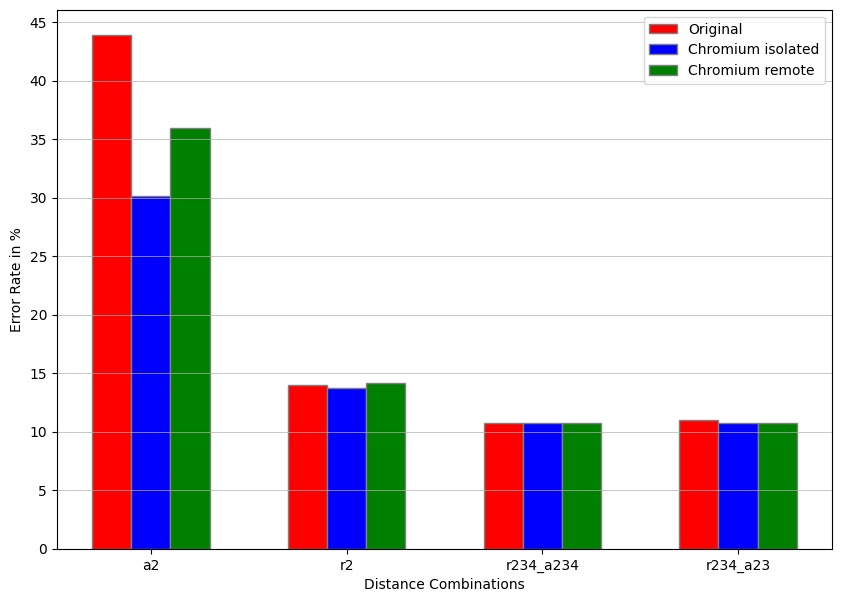

In [4]:
# plot data - classification
 
# set width of bar 
barWidth = 0.2
fig = plt.subplots(figsize =(10, 7))
 
# set height of bar 
data_ori = [original_class_err_a2, original_class_err_r2, original_class_err_r234_a234, original_class_err_r234_a23]
data_chr_iso = [chomium_isolated_class_err_a2, chomium_isolated_class_err_r2, chomium_isolated_class_err_r234_a234, chomium_isolated_class_err_r234_a23]
data_chr_rem = [chomium_remote_class_err_a2, chomium_remote_class_err_r2, chomium_remote_class_err_r234_a234, chomium_remote_class_err_r234_a23]

# Set position of bar on X axis 
br1 = np.arange(len(data_ori)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, data_ori, color ='r', width = barWidth, edgecolor ='grey', label ='Original') 
plt.bar(br2, data_chr_iso, color ='b', width = barWidth, edgecolor ='grey', label ='Chromium isolated') 
plt.bar(br3, data_chr_rem, color ='g', width = barWidth, edgecolor ='grey', label ='Chromium remote') 
 
# Adding Xticks
plt.xlabel('Distance Combinations') 
plt.ylabel('Error Rate in %') 
plt.xticks([r + barWidth for r in range(len(data_ori))], ["a2", "r2", "r234_a234", "r234_a23"])
plt.yticks(np.arange(0, 50, 5))
 
plt.grid(axis = 'y', linewidth = 0.5)
plt.legend()
plt.show() 

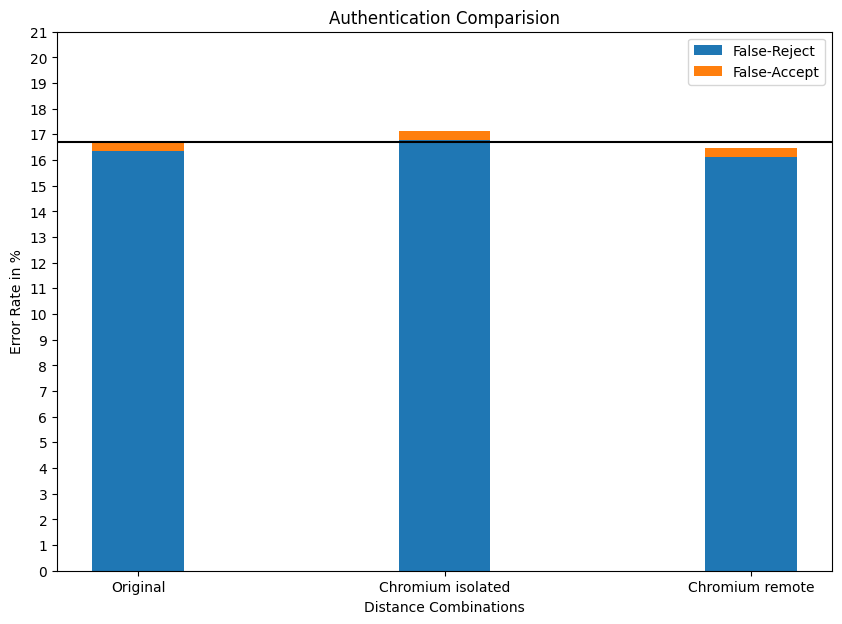

In [5]:
# plot data - authentication

data_fr = [original_auth_fr, chomium_isolated_auth_fr, chomium_remote_auth_fr]
data_fa = [original_auth_fa, chomium_isolated_auth_fa, chomium_remote_auth_fa]

labels = ["Original", "Chromium isolated", "Chromium remote"]

barWidth = 0.3
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(labels, data_fr, width = barWidth)
p2 = plt.bar(labels, data_fa, width = barWidth, bottom=data_fr)
plt.axhline(y = data_fr[0] + data_fa[0], color = 'black')

plt.legend((p1[0], p2[0]), ('False-Reject', 'False-Accept'))

plt.yticks(np.arange(0, 22, 1))
plt.xlabel("Distance Combinations")
plt.ylabel("Error Rate in %")
plt.title("Authentication Comparision")
plt.show()

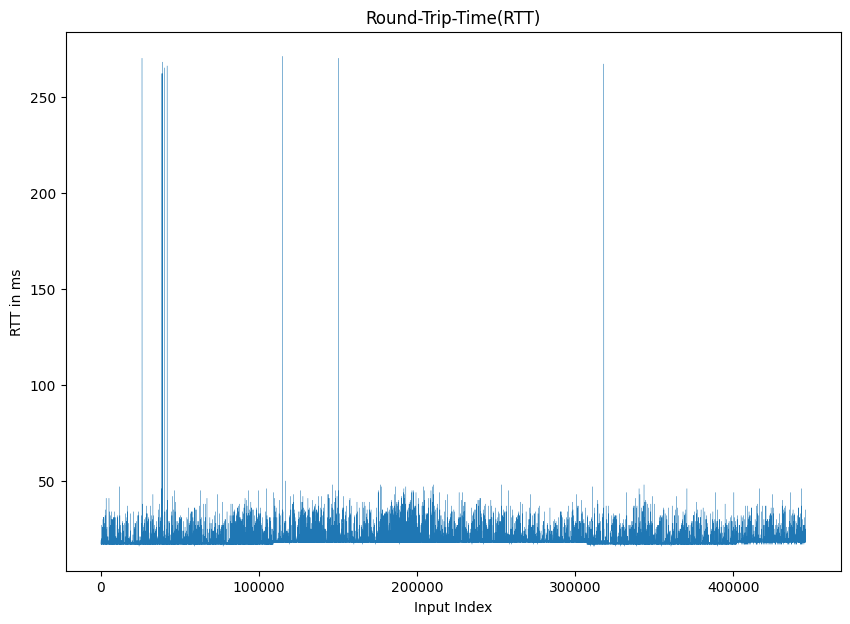

In [6]:
# plot data - rtt

fig = plt.subplots(figsize =(10, 7))
#plt.scatter(np.arange(len(chromium_remote_rtt_data)), chromium_remote_rtt_data, s = 5)
plt.plot(np.arange(len(chromium_remote_rtt_data)), chromium_remote_rtt_data, linewidth=0.2)

plt.xlabel("Input Index")
plt.ylabel("RTT in ms")
plt.title("Round-Trip-Time(RTT)")
plt.show()